In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #splits the data as required
from sklearn.neighbors import KNeighborsClassifier

In [2]:
bcd=pd.read_csv("mpt.csv", header=0)

In [11]:
bcd.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
bcd['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [13]:
bcd.shape

(2000, 21)

In [14]:
bcd.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
objList = bcd.select_dtypes(include = "object").columns
print (objList)

Index([], dtype='object')


In [16]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    bcd[feat] = le.fit_transform(bcd[feat].astype(str))

print (bcd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [17]:
bcd.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [18]:
X = bcd.drop('price_range',axis=1) 
y = bcd['price_range']

In [19]:
print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [20]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

In [76]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy",max_depth=5)
#tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)#### what happened here? training of the algo/model starts here

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

print("Accuracy on testing set: {:.3f}".format(tree.score(X_test, y_test)))

from sklearn.metrics import roc_auc_score
y_pred= tree.predict(X_test)
type(y_test)
from sklearn.metrics import precision_score
print("precision",precision_score(y_test, y_pred, average='weighted'))
from sklearn.metrics import recall_score
print("recall",recall_score(y_test, y_pred, average='weighted'))
from sklearn.metrics import f1_score
print("F1 score", f1_score(y_test, y_pred, average='weighted'))
preds = tree.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,preds, multi_class='ovr')
print("roc",roc_auc)

Accuracy on training set: 0.861
Accuracy on testing set: 0.802
precision 0.8071269832319169
recall 0.8025
F1 score 0.8024241133123879
roc 0.9507458333333334


Feature importances:
[0.10281923 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05920535
 0.05328632 0.78468911 0.         0.         0.         0.
 0.         0.        ]


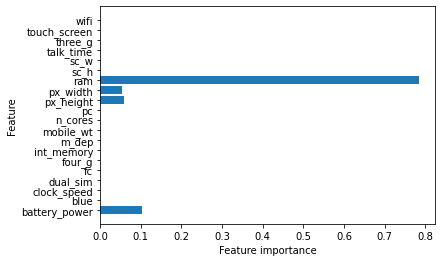

In [77]:
print("Feature importances:\n{}".format(tree.feature_importances_))
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(tree)

In [78]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=20, random_state=0)

forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

y_pred= forest.predict(X_test)
type(y_test)
from sklearn.metrics import precision_score
print("precision",precision_score(y_test, y_pred, average='weighted'))
from sklearn.metrics import recall_score
print("recall",recall_score(y_test, y_pred, average='weighted'))
from sklearn.metrics import f1_score
print("F1 score", f1_score(y_test, y_pred, average='weighted'))
preds = forest.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,preds, multi_class='ovr')
print("roc",roc_auc)

Accuracy on training set: 1.000
Accuracy on test set: 0.865
precision 0.8697721868774501
recall 0.865
F1 score 0.8653763798925089
roc 0.9732624999999999


Feature importances:
[0.07241023 0.00575993 0.02585344 0.00586583 0.02315351 0.00651285
 0.03858753 0.02143146 0.03601063 0.02116653 0.02557043 0.05355486
 0.0600513  0.50353386 0.02688278 0.02810784 0.02845817 0.00585064
 0.00599236 0.00524584]


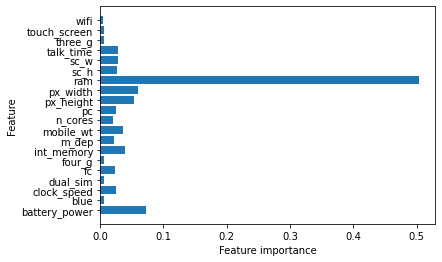

In [37]:
print("Feature importances:\n{}".format(forest.feature_importances_))
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(forest)

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.1,max_depth=2)

gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))

print("GBRT Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

y_pred= gbrt.predict(X_test)
type(y_test)
from sklearn.metrics import precision_score
print("precision",precision_score(y_test, y_pred, average='weighted'))
from sklearn.metrics import recall_score
print("recall",recall_score(y_test, y_pred, average='weighted'))
from sklearn.metrics import f1_score
print("F1 score", f1_score(y_test, y_pred, average='weighted'))
preds = gbrt.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,preds, multi_class='ovr')
print("roc",roc_auc)

Accuracy on training set: 0.968
GBRT Accuracy on test set: 0.927
precision 0.9284545304083537
recall 0.9275
F1 score 0.9276218877559317
roc 0.99175


Feature importances:
[7.99471053e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.02680336e-03 0.00000000e+00 3.21731637e-03 3.27160852e-04
 3.85740772e-03 7.79785381e-04 3.32881395e-04 3.58650266e-02
 2.30140428e-02 8.50138864e-01 7.21687624e-04 4.19204608e-04
 3.43797907e-04 0.00000000e+00 8.91602677e-06 0.00000000e+00]


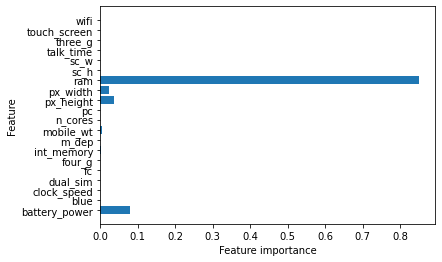

In [63]:
print("Feature importances:\n{}".format(gbrt.feature_importances_))
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(gbrt)

In [80]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

y_pred= clf.predict(X_test)
type(y_test)
from sklearn.metrics import precision_score
print("precision",precision_score(y_test, y_pred, average='weighted'))
from sklearn.metrics import recall_score
print("recall",recall_score(y_test, y_pred, average='weighted'))
from sklearn.metrics import f1_score
print("F1 score", f1_score(y_test, y_pred, average='weighted'))
preds = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,preds, multi_class='ovr')
print("roc",roc_auc)

Accuracy on training set: 0.814
Accuracy on test set: 0.833
precision 0.833969903750974
recall 0.8325
F1 score 0.8329291934822
roc 0.9630083333333332


In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[91,  9,  0,  0],
       [ 7, 90,  3,  0],
       [ 0, 18, 76,  6],
       [ 0,  0, 11, 89]], dtype=int64)

In [69]:
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,2,3,All
Actual,,,,,
0,91,9,0,0,100
1,7,90,3,0,100
2,0,18,76,6,100
3,0,0,11,89,100
All,98,117,90,95,400


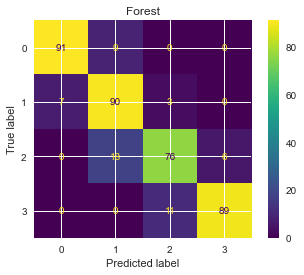

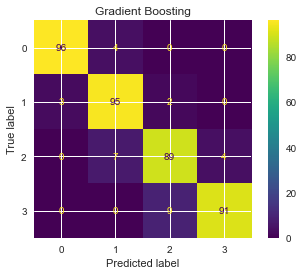

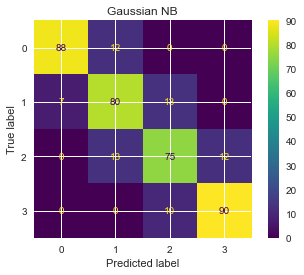

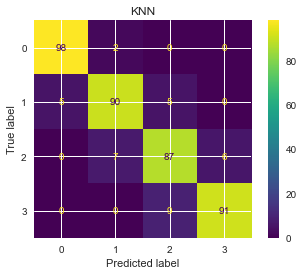

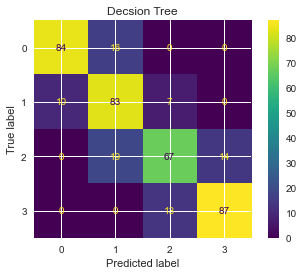

In [100]:
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
plot_confusion_matrix(forest, X_test, y_test) 
plt.title("Forest")
plt.show()

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gbrt, X_test, y_test)
plt.title("Gradient Boosting")
plt.show()

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.title("Gaussian NB")
plt.show()

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)  
plt.title("KNN")
plt.show()

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X_test, y_test)  
plt.title("Decsion Tree")
plt.show()

# Time to Plot ROC Curve

In [68]:
tree.fit(X_train, y_train)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=2, random_state=0)

In [87]:
pred_prob1 = tree.predict_proba(X_test)
pred_prob2 = gbrt.predict_proba(X_test)
pred_prob3 = forest.predict_proba(X_test)
pred_prob4 = knn.predict_proba(X_test)
pred_prob5 = clf.predict_proba(X_test)

In [90]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


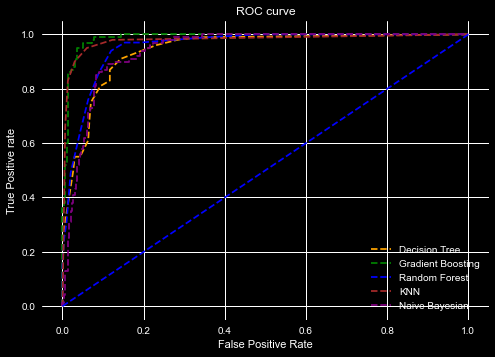

In [94]:
# matplotlib
import matplotlib.pyplot as plt; 
plt.style.use('seaborn')
with plt.style.context('dark_background'):
    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
    plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Gradient Boosting')
    plt.plot(fpr3, tpr3, linestyle='--',color='blue', label='Random Forest')
    plt.plot(fpr4, tpr4, linestyle='--',color='brown', label='KNN')
    plt.plot(fpr5, tpr5, linestyle='--',color='purple', label='Naive Bayesian')

    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    #plt.savefig('ROC',dpi=300)
    plt.show();

# KNN

In [82]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train) #training data and  has been provided to the algorithm

knn.score(X_train,y_train)#the data we are passing will be considered for the accuracy

0.949375

In [84]:
knn.score(X_test,y_test)

y_pred= knn.predict(X_test)
type(y_test)
from sklearn.metrics import precision_score
print("precision",precision_score(y_test, y_pred, average='weighted'))
from sklearn.metrics import recall_score
print("recall",recall_score(y_test, y_pred, average='weighted'))
from sklearn.metrics import f1_score
print("F1 score", f1_score(y_test, y_pred, average='weighted'))
preds = knn.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,preds, multi_class='ovr')
print("roc",roc_auc)

precision 0.9150194220703223
recall 0.915
F1 score 0.9148923410639966
roc 0.9852041666666667


# K-Means

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)

km.fit(X)

In [ ]:
identified_clusters = km.fit_predict(X)
identified_clusters

In [ ]:
bcd_with_clusters = bcd.copy()


In [ ]:
bcd_with_clusters.head()

In [ ]:
bcd_with_clusters['Clusters'] = identified_clusters 

In [ ]:
bcd_with_clusters.head()

In [ ]:
plt.scatter(bcd_with_clusters['Clump Thickness'],bcd_with_clusters['Single Epithelial Cell Size'],c=bcd_with_clusters['Clusters'],cmap='rainbow')

In [ ]:
bcd_with_clusters.to_excel (r'D:\SP Jain laptop exchange\Anshul Gupta\Subjects\Data Science and Analytics\Deck\Session-5\BCd with Clusters.xlsx', index = False, header=True)

In [ ]:
df = bcd_with_clusters

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
#group by on the desire columns
#df['Class'] = df['Class'].map({0:'Benign', 1:'Malignant'})

In [ ]:
df['Class'].replace(to_replace=['Benign'],value='1',inplace=True)

In [ ]:
df['Class'].replace(to_replace=['Malignant'],value='0',inplace=True)

In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
df['Class'] = df['Class'].astype("int64") # string/object converted into int64

In [ ]:
df.info()

In [ ]:
df['correct'] = df.Class == df.Clusters

In [ ]:
df.head()

In [ ]:
grouped = df.groupby('Class').agg({'Class': 'size','correct': 'sum'})

In [ ]:
grouped.head()

In [ ]:
grouped['acc'] = grouped['correct'] / grouped['Class']
print(grouped)

Accuracy = grouped['acc'].mean()

print(Accuracy)

#grouped.describe()

In [ ]:
import matplotlib.pyplot  as plt
distortions = []
for i in range(1,10):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Unlabelled to labelled..!!

In [ ]:
df1= df.drop('Class',axis=1) 

In [ ]:
df1.head()

In [ ]:
df1= df1.drop('correct',axis=1) 

In [ ]:
df1.head()

In [182]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

#X, y = load_iris(return_X_y=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
#clf = LogisticRegression(solver="liblinear").fit(X_train, y_train)
preds = knn.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,preds, multi_class='ovr')
print(roc_auc)

0.9852041666666667
